In [69]:
import pandas as pd
from matplotlib import matplotlib_fname
# here we are loading the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [70]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
# taking the target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
# adding a new dataframe
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
# 'setosa'
df[df.target == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
# 'versicolor'
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [76]:
# 'virginica'
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [77]:
# splitting
df1 = df[df.target==0]
df2 = df[df.target==1]
df3 = df[df.target==2]

Text(0, 0.5, 'petal width (cm)')

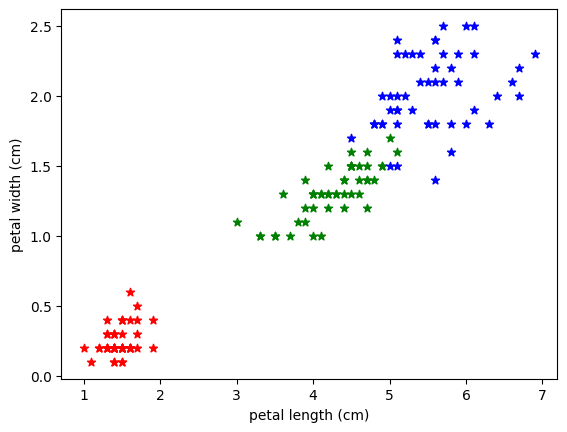

In [78]:
import matplotlib.pyplot as plt
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='red', marker = '*')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='green', marker = '*')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color='blue', marker = '*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [79]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis='columns')
Y = df.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [81]:
model.score(X_test, Y_test)

1.0

Text(58.222222222222214, 0.5, 'True label')

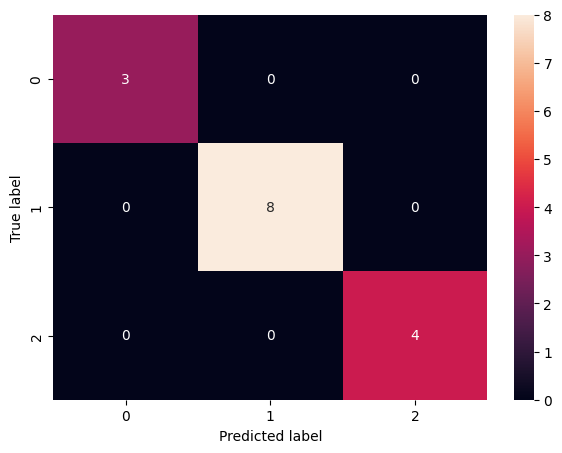

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Y_test, model.predict(X_test))
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted label')
plt.ylabel('True label')